<a href="https://colab.research.google.com/github/Khamsaen2489/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)


*หมายเหตุ เรียนท่านอาจารย์ที่เคารพกระผมนาย คำแสน แก้วพิภพ 623020761-8 ชั้นปีที่ 2 ได้ทำการอัดวิดิโอด้วยเครื่องคอมพิวเตอร์
ซึ่งไม่สามารถแสดงวิดิโอที่แสดงให้เห็นถึงใบหน้าในขณะที่อัดวิดิโอได้
          
          เรียนมาเพื่อโปรดทราบ
          คำแสน แก้วพิภพ

In [63]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [64]:
Name = 'คำแสน แก้วพิภพ'
ID = '6230207618'

In [65]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [66]:
Data = DataGenerator(Name,ID)

020:30:14


In [67]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325,16.710729
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858,39.328496
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680,15.747013
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807,4.948332
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365,38.264218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.115431,7.000837,-9.653089,-7.160725,9.323379,0.008322,8.853850,2.496611,3.815244,0.382697,6.690362,-3.427856,-4.262191,-1.233465,-2.097576,6.860297,-3.083898,-1.410190,-0.426802,-2.115237,2.321582,-6.152592,4.205598,-4.351731,9.674877,-8.252335,6.537963,-1.520673,-7.923699,3.938198,14.001675,21.690991
9996,8.642016,-10.310443,-4.164195,-0.103425,5.280763,10.100324,10.376776,2.035528,-2.865085,-3.634668,3.175611,3.091032,4.854759,-3.718518,9.154610,7.477065,-5.644479,3.183633,7.624630,-10.160440,-6.843769,9.264963,6.128426,4.705592,9.834965,-6.510483,-8.046730,5.285699,-0.492100,4.496800,-20.620886,24.484000
9997,2.576362,-2.282850,-1.977706,7.939707,1.760702,-6.222240,3.906714,-4.212861,7.771867,-2.179046,-7.370692,1.098961,-5.226815,-7.994809,-3.480564,1.547576,1.043375,7.676349,2.609321,-8.077446,6.056793,-7.367577,-8.567476,-3.069323,4.276709,-6.563668,-2.562896,10.299857,8.607741,1.419396,-4.565701,9.096982
9998,5.623216,6.132319,-9.526871,-7.102227,7.470630,1.645184,7.913972,-0.513498,6.165712,-2.734110,7.303640,-0.367817,-4.374165,-1.374892,-1.328014,6.636919,-2.271619,-4.250679,-0.379184,-3.499792,3.763622,-6.828777,4.275611,-3.615921,9.257696,-6.524113,6.213284,-3.265337,-6.691210,4.450119,12.264638,24.250595


# **2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

clustering คือ การหาความสัมพันธ์ของข้อมูล เพื่อแบ่งข้อมูลออกเป็นกลุ่มๆ
จุดมุ่งหมายของการทำ คือ การจัดกลุ่มข้อมูลโดยดูจาก attributes ของข้อมูล 

ตรวจสอบขนาดของข้อมูลว่า มี data กี่ตัว เเละมีกี่ dimensions 

In [68]:
Data.shape # จะเห็นได้ว่า dimension ที่ Ran ออกมามีทั้งหมด 32 dimension 

(10000, 32)

## **ข้อมูล Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด มีหรือให้ข้อมูลซ้ำกับ column อื่นๆ เเล้วลบมันออกไป**

#### **ตรวจสอบดูว่า ระหว่าง colums มี correlation มากน้อยเเค่ไหน ด้วยคำสั่ง numpy**

In [78]:
import numpy as np

In [79]:
corr = np.corrcoef(Data.to_numpy().T) # หา correlation ว่ามีเท่าใด

In [83]:
corr.shape

(32, 32)

In [84]:
corr

array([[ 1.        , -0.03522889,  0.06557524, ...,  0.41074998,
        -0.03522889,  0.41074998],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.06557524,  0.26280354,  1.        , ..., -0.01992461,
         0.26280354, -0.01992461],
       ...,
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ]])

In [87]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') #จะพบว่าเมื่อเรา Run ออกว่าไม่มีค่าออกมาแสดงว่าไม่มีค่าที่ซ้ำกันในข้อมูลนี้
            

#### **Kmean**

##### **Import**

In [95]:
from sklearn.cluster import KMeans

##### **Define**

In [96]:
kmeans = KMeans(random_state=2021) #random state คือจะทำให้มีค่าตรงกันมากที่สุด

##### **Fit - Transform**

In [97]:
kmeans.fit(Data) # ไว้เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [98]:
kmeans.cluster_centers_

array([[ 2.68465309e+00,  5.51281836e+00,  1.59377799e+00,
        -1.14098972e+00, -1.96321082e+00,  1.74906213e+00,
        -2.92547218e+00,  3.21082773e-01, -7.86961544e-01,
        -4.97237840e+00, -1.00286744e+00,  2.73316601e+00,
         9.96214564e-01,  2.42519924e+00,  3.65427957e-01,
        -3.81964919e+00, -7.21604655e+00,  3.49292498e+00,
         6.24430114e-01, -5.86822571e+00,  5.92854052e+00,
         3.57690327e+00,  3.41999915e+00, -1.50558073e-01,
         5.58089454e+00,  8.29768864e-01,  2.99271943e+00,
         4.86660992e+00, -1.14473884e+00,  9.69344807e-02,
         1.10256367e+01,  2.48467240e+00],
       [ 4.81312383e+00, -7.13526097e+00, -3.80883929e+00,
         1.34899279e+00,  4.99552690e+00,  9.41670956e+00,
         5.96973041e+00,  8.03495698e-01, -4.28205996e+00,
        -5.63031415e-01,  1.02225355e+00, -1.86353837e-01,
         3.53121455e+00,  2.77303843e+00,  6.18565004e+00,
         3.71192715e+00, -9.26798331e-01,  5.98123956e+00,
         7.09

### **ทดสอบการจัดกลุ่มของ Data**

In [99]:
y = kmeans.predict(Data) #เพื่อนำค่า Y ที่ได้นำไป plot กราฟต่อไป
y

array([7, 6, 0, ..., 2, 7, 7], dtype=int32)

### **ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป** 

เป็นการลด Dimension ของข้อมูล โดยจะรักษา Information ไว้


###### **Import**

In [111]:
from sklearn.decomposition import PCA

##### **Define**

In [112]:
pca = PCA(n_components=2) #กำหนดให้เป็น 2 กลุ่ม

#####  **Fit - Transform**

In [113]:
new_pca = pca.fit_transform(Data)

In [114]:
new_pca.shape #ตอนนี้ Dimension ของเราจะเหลือแค่ 2 Dimension แล้ว

(10000, 2)

In [115]:
from matplotlib import pyplot as plt #เพิ่ม matplotlib เพื่อนำมาไว้ plot กราฟ

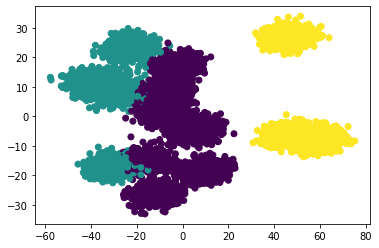

In [108]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

#####**นี้คือกราฟที่เรา plot ได้จากการทำ Kmean**

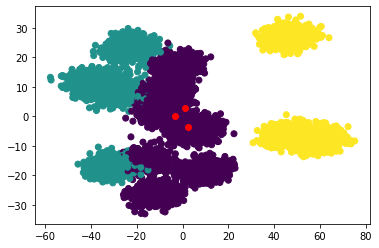

In [109]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

#####**กราฟนี้จะแสดง  cluster center เราจะเห็นได้ว่าจุดศูนย์กลางของกราฟ  cluster center คือจุดที่เป็นสีแดงๆ**

#####**จากนั้นจะทำการหาค่า k  ที่เหมาะสม โดยการใช้  Elbow Method **

#### **SSE (Sum of Squared Errors)**
SSE คือ ความไม่ใกล้เคียงกับจุดศูนย์กลาง

In [123]:
kmeans.inertia_

4633939.742169999

In [138]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]: #กำหนดค่าของ K ให้มีค่าตั้งแต่ 1-10
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [139]:
SSE

[19492074.617149524,
 12287226.791411135,
 10192922.646103252,
 8882237.446246957,
 7776083.319813388,
 6741366.527387712,
 5648010.760576062,
 4633939.742169999]

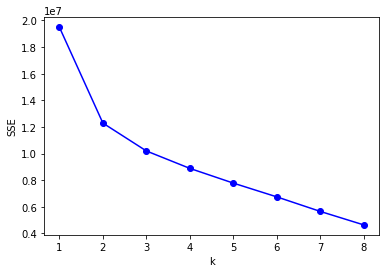

In [140]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') 
plt.xlabel('k')
plt.ylabel('SSE');

#####**ได้ค่าของ Elbow Method จากการ plot กราฟ จุดหักหรือค่าที่ดีที่สุดเท่ากับ 2**

####**Silhouette coefficient**
เป็นวิธีที่ไว้ใช้หาจำนวน k ที่เหมาะสมที่สุด

In [141]:
from sklearn import metrics

In [146]:
SilH = list()
for k in [2,3,4,5,6,7,8]: #เราจะกำหนดค่า K ตั้งแต่ 2-8 
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

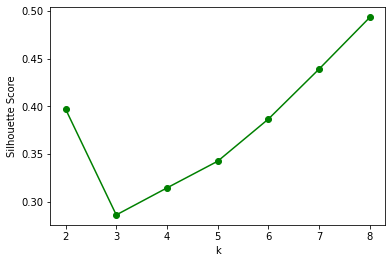

In [147]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') 
plt.xlabel('k')
plt.ylabel('Silhouette Score');

#####**ได้ค่าของ Silhouette coefficient จากการ plot กราฟ จุดหักหรือค่าที่ดีที่สุดเท่ากับ 3**

#**3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

เราจะใช้วิธี MDS (Multidimension Scaling) คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อย

In [156]:
from sklearn.manifold import MDS

In [157]:
mds = MDS(n_components=2) #กำหนด components เท่ากลับ 2 กลุ่ม

In [158]:
new_mds = mds.fit_transform(new_data) #ใช้คำสั่ง new data ในการตัดข้อมูลออก เพราะจะให้เกิดการ error ของข้อมูลได้เนื่องข้อมูลมีเยอะจนเกินไป

In [159]:
kmeans_2 = KMeans(n_clusters=3,random_state=2021)
kmeans_2.fit(new_data)
g = kmeans_2.predict(new_data)

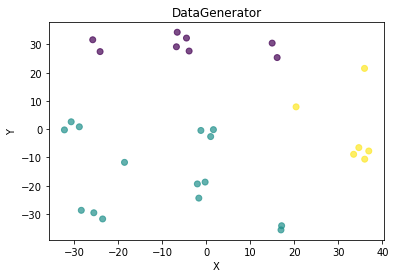

In [160]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

#####**การเปรียบเทียบ ระหว่าง ข้อ 2 และข้อ 3 หลังจากการลด Dimension ของข้อมูลด้วย MDS**
#####**โดยพบว่าข้อมูลมีการกระจายที่ไม่แตกต่างกันของข้อที่ 2 และข้อที่ 3 สังเกตจากการกระจายของจุดสีในกราฟที่ plot ทั้งข้อที่ 2 และข้อที่ 3**